# Onderzoek naar het vergelijken van teksten met behulp van een computer

## Inleiding

Toen Spinoza in 1670 zijn 'Theologisch-politiek traktaat' publiceerde, deed hij dat in het Latijn. Publicatie van vertalingen hield hij actief tegen, omdat hij bang was dat dit kon leiden tot een gevangenisstraf. Zijn ideeën waren zijn tijd namelijk nogal vooruit; ze zouden pas in de verlichting algemener aanvaard worden. In 1674 werd zijn werk dan ook door de overheid verboden. Hierdoor werd er pas in 1693 een eerste vertaling gepubliceerd. In 1694 volgde een tweede en er is een derde ongedateerde handgeschreven vertaling gevonden. Al deze vertalingen zijn natuurlijk verschillend, maar op sommige plekken toch bijna letterlijk hetzelfde. De overeenkomsten tussen de verschillende vertalingen kunnen veel zeggen over de verspreiding van Spinoza's werk in de jaren, waarin het boek eigenlijk verboden was. Omdat het erg tijdrovend en subjectief is om deze overeenkomst met de hand te bepalen, moet een computer gebruikt worden. Maar hoe kan een computer de overeenkomst tussen stukken tekst bepalen? Dat wordt in dit onderzoek aan de hand van het werk van Spinoza onderzocht. Er zijn voor de verschillende stappen in het proces, verschillende manieren bedacht en die zijn getoetst om te bepalen wat het beste werkt.

## Onderzoeksvraag

De onderzoeksvraag is: "Hoe kan een computer de overeenkomst tussen stukken tekst bepalen?"

Om deze vraag te beantwoorden, moeten een aantal deelvragen beantwoord worden. Het is hiervoor belangrijk eerst te begrijpen hoe het algoritme er in grote lijnen uit zal zien:

Eerst worden de teksten gesplitst in losse delen. Dit kunnen zinnen zijn, maar bijvoorbeeld ook alinea's of hoofdstukken. Vervolgens worden de stukken tekst in beide teksten die een vertaling zijn van hetzelfde aan elkaar gekoppeld. Van al deze koppels wordt dan de overeenkomst bepaald en uitgedrukt in een getal. De overeenkomst wordt dan in een grafiek uitgezet tegen de plaats van het stuk tekst.

Dit roept de volgende deelvragen op:
    1. Hoe kan de tekst het best gesplitst worden in delen?
    2. Hoe kunnen de zinnen die een vertaling zijn van hetzelfde correct aan elkaar gekoppeld worden?
    3. Hoe kan de overeenkomst tussen twee stukken tekst bepaald worden en uitgedrukt worden in een getal?
    4. Bij welke waarde van de overeenkomst ligt de grens tussen 'hetzelfde' en 'verschillend'?

De verschillende manieren die ik voor de deelvragen gevonden heb worden in het vervolg toegelicht. Elke manier wordt getoetst aan de hand van het aantal correct gepaarde zinnen in een deel van de tekst. Ook wordt er gekeken of er met de gebruikte manier genoeg onderscheid te maken is tussen verschillende stukken tekst.

## Hypothese

## Werkwijze

De uitvoering van het algoritme bestaat uit drie delen: de voorbewerking van de teksten, zodat deze makkelijker voor de computer te interpreteren zijn, de analyse en dus het bepalen van de overeenkomst en ten slotte de visualisatie: het uitzetten van de gegevens in een grafiek.

### Voorbewerking van de teksten

#### Verwijderen van overbodige witregels
Allereerst moeten bij de voorbewerking al aanwezige enters, witregels, etc. verwijderd worden. Op die manier ontstaat een doorlopende tekst, die makkelijker te interpreteren is voor de computer. Hiervoor heb ik de functie 'superstrip()' geschreven.

In [ ]:
def superstrip(path_bron, path_doel):
    import codecs
    file = codecs.open(path_bron, 'r', 'utf-8')
    lines = [line.strip() for line in file]
    text = " ".join(lines)
    file.close()
    file = codecs.open(path_doel, 'w', 'utf-8')
    file.write(text)
    file.close()

#### Opslitsen in verschillende delen

Het opsplitsen in verschillende delen is op verschillende manieren gebeurd. Een eerste manier die ik gebruikt heb is het opsplitsen in zinnen. Aan de hand van interpunctie is de tekst opgesplitst in losse zinnen, gescheiden door een enter. Hiervoor heb ik eerst zelf een functie geschreven ('sentence_split()'); later heb ik een functie geimporteerd van de nltk ('nltk.tokenize.sent_tokenize()'). Ik heb deze functies de tekst uit een document laten nemen om de bewerkte tekst vervolgens in een nieuw document op te slaan. Doordat in de ene tekst meer zinnen samengevoegd zijn dan in de andere tekst, levert het splitsen in zinnen in de ene tekst langere blokken op dan in de andere tekst. Ter vervanging van deze manier heb ik dus nog een functie geschreven: 'chunktokenizer()'. Deze functie splitst de tekst op in duizend blokken met evenveel woorden. Als laatste heb ik de tekst opgesplitst in hoofdstukken. Dit kan waarschijnlijk, omdat het aannemelijk is dat een heel hoofdstuk overgenomen werd wanneer er gekopieerd werd door vertalers. Dit is echter niet zeker. Voor het opsplitsen in hoofdstukken heb ik geen functie geschreven. Dit heb ik met de hand gedaan.

In [ ]:
def sentence_split(Path_bron, Path_doel):
    superstrip(Path_bron, Path_doel)
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
            elif zin[0] == ')':
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
            
    
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
    superstrip(Path_doel, Path_doel)
    
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
    
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
    superstrip(Path_doel, Path_doel)
    
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
    
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
def nltktokenize(path_bron, path_doel):
    from nltk.tokenize import sent_tokenize
    import codecs
    file = codecs.open(path_bron, 'r', 'utf-8')
    text = file.read()
    file.close()
    text = sent_tokenize(text, language='dutch')
    text = '\n'.join(text)
    file = codecs.open(path_doel, 'w', 'utf-8')
    file.write(text)
    file.close()
    
def chunktokenizer(path_bron, path_doel):
    import codecs
    file = codecs.open(path_bron, 'r', 'utf-8')
    text = file.read()
    file.close()
    words = text.split()
    number_of_words = len(words)
    words_per_chunk = int(round(number_of_words/1000))
    start = 0
    end = words_per_chunk + 1
    chunks = []
    while start < number_of_words:
        chunk = ' '.join(words[start:end])
        chunks.append(chunk)
        start += words_per_chunk
        end += words_per_chunk
    text = '\n'.join(chunks)
    file = codecs.open(path_doel, 'w', 'utf-8')
    file.write(text)
    file.close()




#### Overbodige tekens en hoofdletters verwijderen
Bij het interpreteren van de tekst gaat het alleen om de woorden. Zodra de teksten dus gesplitst zijn in zinnen, moet alle interpunctie verwijderd worden. Om de teksten goed te vergelijken moet het algoritme niet hoofdlettergevoelig zijn. Hierom heb ik alle hoofdletters in de tekst geconverteerd naar kleine letters.

In de 17e eeuw was er nog geen uniforme Nederlandse spelling. Anders gespelde woorden moet de computer echter wel als hetzelfde herkennen. Bij bestudering van de teksten valt op dat de verschillen in spelling vaak verschillen in het gebruik van klinkers zijn. Ook het gebruik van de letters d, t, s, z en j verschilt erg. Deze letters gecombineerd met de klinkers zijn dus blijkbaar niet kenmerkend voor een woord. Ik heb het algoritme daarom al deze letters uit de tekst laten verwijderen.

Ik heb hier geen losse functie voor geschreven. Het verwijderen van deze tekens is verwerkt in de rest van het algoritme.

In [ ]:
def interpunction_uppercase_remove_text(text):
    import string
    kenmerkende_letters = ['q', 'w', 'r', 'p', 'f', 'g', 'h', 'k', 'l', 'x', 'c', 'v', 'b', 'n', 'm']
    niet_kenmerkende_letters = ['e', 't', 'y', 'u', 'i', 'o', 'a', 'd', 'j', 'z']
    interpunctie = list(string.punctuation)
    interpunctie.append("’")
    interpunctie.append("‘")
    text = text.lower()
    for letter in niet_kenmerkende_letters :
        text = text.replace(letter, '')
    for letter in interpunctie:
        text = text.replace(letter, '')
    return text





### Analyse van de teksten
Bij de analyse moet van verschillende stukken in de tekst de overeenkomst worden bepaald. Er zijn hierbij een paar obstakels. Ten eerste worden er in de teksten sommige zinnen aan elkaar geplakt, of er worden juist nieuwe zinnen toegevoegd. Dit zorgt ervoor dat bijvoorbeeld zin 300 in de ene tekst niet dezelfde betekenis heeft als zin 300 in de andere tekst. De overeenkomst tussen deze twee zinnen bepalen zou zinloos zijn. Voor elke zin in de ene tekst moet dus de qua betekenis equivalente zin in de andere tekst gevonden worden. Ten tweede is de overeenkomst tussen twee zinnen bepalen lastig. Hiervoor heb ik verschillende manieren getest.

#### Bepalen van overeenkomst
Bij het bepalen van de overeenkomst tussen twee stukken tekst heb ik verschillende technieken gebruikt: overeenkomst op basis van lettervoorkomen, overeenkomst op basis van woordoverlap en overeenkomst met tf-idf.

##### Overeenkomst op basis van lettervoorkomen
Bij de overeenkomst op basis van lettervoorkomen wordt gekeken naar het aantal keer dat een letter voorkomt in een stukje tekst. Van beide stukken tekst wordt van elke letter het voorkomen geteld. Vervolgens wordt voor elke letter de absolute waarde van het verschil in voorkomen van die letter in beide teksten berekend. Al deze vershillen worden vervolgens bij elkaar opgeteld. Hoe hoger deze waarde, hoe minder overeenkomst tussen beide zinnen. Langere zinnen hebben echter meer kans op een hogere waarde. Om hiervoor te corrigeren wordt de som van de verschillen gedeeld door de som van het totale aantal letters van beide zinnen. Op deze manier wordt altijd een waarde tussen 0 en 1 verkregen. Het uiteindelijke resultaat is dan 1 minus deze waarde. Op die manier betekent 0 geen overeenkomst en 1 maximale overeenkomst. De functie die ik hiervoor geschreven heb heet 'match_characters()'.

In [ ]:
def countcharacter(string, character):
    count = 0
    for element in string:
        if element == character:
            count+=1
    return count


def match_characters(string1, string2):
    list1 = []
    list2 = []
    verschillen = []
    string1 = string1.lower()
    string2 = string2.lower()
    kenmerkende_letters = ['q', 'w', 'r', 't', 'p', 's', 'd', 'f', 'g', 'h', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm']
    for letter in kenmerkende_letters:
        list1.append(countcharacter(string1, letter))
        list2.append(countcharacter(string2, letter))
    list_zipped = zip(list1, list2)
    for paar in list_zipped:
        waarde1, waarde2 = paar
        verschillen.append(abs(waarde1 - waarde2))
    for character in string1:
        if character not in kenmerkende_letters:
            string1 = string1.replace(character, "")
    for character in string2:
        if character not in kenmerkende_letters:
            string2 = string2.replace(character, "")
    match = 1-(sum(verschillen)/(len(string1)+len(string2)))
    return match 




##### Overeenkomst op basis van woordoverlap
Bij de overeenkomst op basis van woordoverlap wordt gekeken naar hoeveel woorden in beide zinnen voorkomen. Dit aantal wordt vervolgens ook weer gecorrigeerd naar lengte van de zin door het te delen door het gemiddelde aantal woorden per zin. Ook worden woorden die na het verwijderen van niet-kenmerkende letters nog maar uit één letter bestaan, niet meegerekend bij de woordoverlap. De kans is namelijk groot dat deze woorden zonder niet-kenmerkende letters hetzelfde zijn, maar toch verschillend zijn met deze letters erbij. Bovendien zijn dit vaak korte voeg- of lidwoorden. Deze woorden voegen niet veel toe aan de betekenis van een zin. De functie hiervoor heb ik 'match_wordsintersection()' genoemd.

In [ ]:
def match_wordsintersection(sentence1, sentence2):
    sentence1 = interpunction_uppercase_remove_text(sentence1)
    sentence2 = interpunction_uppercase_remove_text(sentence2)
    sentence1 = set(sentence1.split())
    sentence2 = set(sentence2.split())
    intersection = sentence1.intersection(sentence2)
    intersection = list(intersection)
    for word in intersection:
        if len(word) < 2:
           intersection.remove(word)
    match = (2*len(intersection)/(len(sentence1) + len(sentence2)))
    return match




##### Overeenkomst met tf-idf
Tf-idf is een techniek om overeenkomst tussen teksten te bepalen die bijvoorbeeld veel gebruikt wordt in zoekmachines om de overeenkomst tussen de tekst op een website en de zoekopdracht te bepalen. De techniek bestaat uit twee delen: Term Frequency (tf) en Inverse Document Frequency (idf).

De term frequency is simpelweg het aantal keer dat een bepaalde term voorkomt in een tekst. Vaak wordt dit nog wel gecorrigeerd naar de lengte van de tekst. In dit onderzoek heb ik het aantal keer dat een term in een tekst voorkomt gedeeld door het het aantal keer dat de term die het meeste voorkomt in die tekst, voorkomt. Op die manier is de tf-waarde altijd een getal tussen 0 en 1. 

De inverse document frequency is er om het belang van bepaalde woorden te bepalen. Wanneer in een tekst bijvoorbeeld heel vaak het woord 'de' voorkomt, kan je nog niets zeggen over de inhoud van die tekst. Juist woorden die normaalgesproken zeldzaam zijn, maar in de tekst wel vaak voorkomen, kunnen veel verraden over de betekenis. De tf-waarde van deze woorden is dus belangrijker. Bij de inverse document frequency wordt daarom in alle te vergelijken tekstfragmenten gezocht naar een term. Het aantal tekstfragmenten waarin de term voorkomt wordt dan geteld. Wanneer een term in meer documenten voorkomt is deze dus minder belangrijk. De idf waarde wordt dan berekend door het totale aantal tekstfragmenten te delen door het aantal tekstfragmenten waarin de term voorkomt en daar de logaritme van te nemen. Vaak wordt bij het aantal tekstfragmenten waarin de term voorkomt nog 1 opgeteld om delen door 0 te voorkomen. Ook in dit onderzoek heb ik dat gedaan.

Voor elke term heeft een tekstfragment dus een tf waarde en een idf waarde. Dit heb ik gebruikt door voor een zin van elke term de tf en de idf waarde in de andere zin te bepalen. De idf waarde wordt dan verkregen door te vergelijken met de andere zinnen in de vertaling. Deze tf en idf waarde van elke term heb ik dan met elkaar vermenigvuldigd om de tf-idf-waarde te berekenen. Al deze tf-idf-waardes heb ik bij elkaar opgeteld en gedeeld door het aantal woorden in de zin. Hoe hoger deze waarde dan is, hoe groter de overeenkomst tussen de zinnen.

In [ ]:
def tf(term, string):
    terms = string.split()
    termsset = set(terms)
    terms_enkel = list(termsset)
    frequencies = []
    for word in terms_enkel:
        count = 0
        for element in terms:
            if element == word:
                count += 1
        frequencies.append(count)
    maximum = max(frequencies)
    count = 0
    for word in terms:
        if word == term:
            count += 1
    tf = count/maximum
    return tf

def idf(term, text):
    textlist = text.split('\n')
    count = 0
    import math
    for element in textlist:
        words = element.split()
        if term in words:
            count += 1
    idf = math.log(len(textlist)/(count+0.000001))
    return idf

def tfidf(term, string, text):
    tfidf = tf(term, string)*idf(term, text)
    return tfidf

def match_tfidf(string1, string2, text2):
    string1 = interpunction_uppercase_remove_text(string1)
    string2 = interpunction_uppercase_remove_text(string2)
    text2 = interpunction_uppercase_remove_text(text2)
    string1list = string1.split()
    match = 0
    for element in string1list:
        count = 0
        waarde = tfidf(element, string2, text2)
        for word in string1list:
            if word == element:
                count += 1
        match += waarde*count
        match = match/len(string1list)
    return match




#### Koppelen van equivalente zinnen
Het koppelen van equivalente zinnen is gedaan door van een zin in de ene vertaling de overeenkomst met elke zin in de andere vertaling te bepalen. De zin waarmee de overeenkomst het grootst is, wordt dan gekoppeld aan deze zin. Dit wordt voor elke zin in de vertaling gedaan. Op deze manier onstaat een lijst van gekoppelde zinnen. Hiervoor heb ik drie verschillende functies geschreven op basis van de eerder beschreven drie manieren van bepalen van overeenkomst.

In [ ]:
def pairs_characters(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_characters(string1, string2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

def pairs_wordsintersection(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_wordsintersection(string1, string2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

def pairs_tfidf(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_tfidf(string1, string2, text2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

#### Visualisatie

Voor de visualisatie wordt de overeenkomst van een zinnenpaar in een grafiek uitgezet tegen de plaats van dat zinnenpaar. Daarnaast worden de zinnenparen in een document geplakt met de overeenkomst erbij. Aan de hand van dit document kan gecontroleerd worden of zinnen goed aan elkaar gekoppeld zijn.

In [ ]:
def plot_characters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_characters(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_characters(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
    
def plot_wordsintersection(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_wordsintersection(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_wordsintersection(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
def plot_tfidf(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_tfidf(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_tfidf(string1, string2, text2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n\n" + zin2 + "\n\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))

## Resultaten

Voor het testen van de verschillende manieren wordt eerst de voorbewerking gedaan. Deze wordt voor elk document op drie verschillende manieren gedaan: met de eigen gemaakte tokenizer, met de tokenizer van de nltk en met de chunktokenizer.

In [4]:
from functions_spinoza import sentence_split
from functions_spinoza import nltktokenize
from functions_spinoza import chunktokenizer

sentence_split(r'Onbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8', r'Voorbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8_sentence_split')
sentence_split(r'Onbewerkte_documenten/TTP1693_no_markup_utf8', r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_sentence_split')
sentence_split(r'Onbewerkte_documenten/TTP1694_no_markup_utf8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_sentence_split')
nltktokenize(r'Onbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8', r'Voorbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8_nltktokenize')
nltktokenize(r'Onbewerkte_documenten/TTP1693_no_markup_utf8', r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize')
nltktokenize(r'Onbewerkte_documenten/TTP1694_no_markup_utf8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize')
chunktokenizer(r'Onbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8', r'Voorbewerkte_documenten/Spinoza_unknown_GSV_unknown_corrected_utf8_chunktokenizer')
chunktokenizer(r'Onbewerkte_documenten/TTP1693_no_markup_utf8', r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_chunktokenizer')
chunktokenizer(r'Onbewerkte_documenten/TTP1694_no_markup_utf8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_chunktokenizer')

### Bepalen van overeenkomst

Bij het bepalen van de beste manier om de overeenkomst te bepalen wordt steeds gekeken naar de eerste twintig zinnen van het het document: 'TTP1693_no_markup_nltktokenize' en de zinnen die daarbij horen uit het document: 'TTP1694_no_markup_nltktokenize'. Voor deze zinnen worden de 'plot'functies van alle verschillende manieren om overeenkomst te bepalen uitgevoerd. Vervolgens wordt in de gecreëerde documenten gekekeken hoeveel zinnen correct aan elkaar gekoppeld zijn.

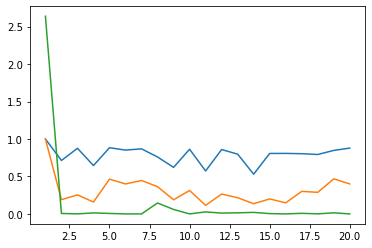

In [1]:
from functions_spinoza import plot_characters
from functions_spinoza import plot_wordsintersection
from functions_spinoza import plot_tfidf

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_twintig', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_twintig', r'Resultaten/TTP1693_TTP1694_characters')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_twintig', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_twintig', r'Resultaten/TTP1693_TTP1694_wordsintersection')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_twintig', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_twintig', r'Resultaten/TTP1693_TTP1694_tfidf')